<a href="https://colab.research.google.com/github/Syahla031/SyahlaArgyanti_WorkshopDS/blob/main/UAS_A11_2021_13738_SyahlaArgyanti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import lib yang perlu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Baca dataset code-cell berikut
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
print("Info Dataset:")
print(data.info())
print("\nDeskripsi Dataset:")
print(data.describe())
print("\nJumlah Missing Values:")
print(data.isnull().sum())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

Deskripsi Dataset:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.

In [4]:
# Langkah 4: Validasi dan Penanganan Missing Values
# Mengganti missing values dengan mean
data.fillna(data.mean(), inplace=True)

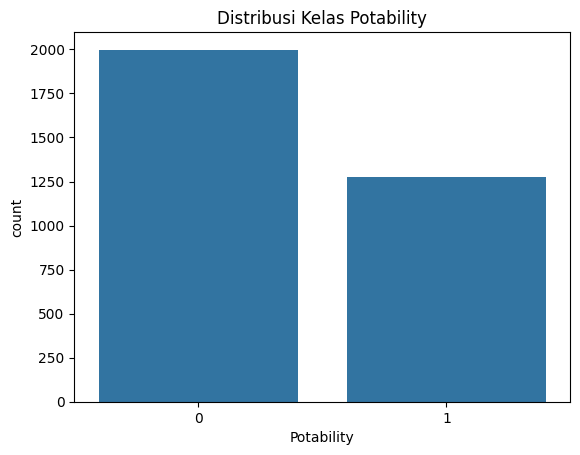

In [5]:
# Visualisasi distribusi data target
sns.countplot(x='Potability', data=data)
plt.title("Distribusi Kelas Potability")
plt.show()

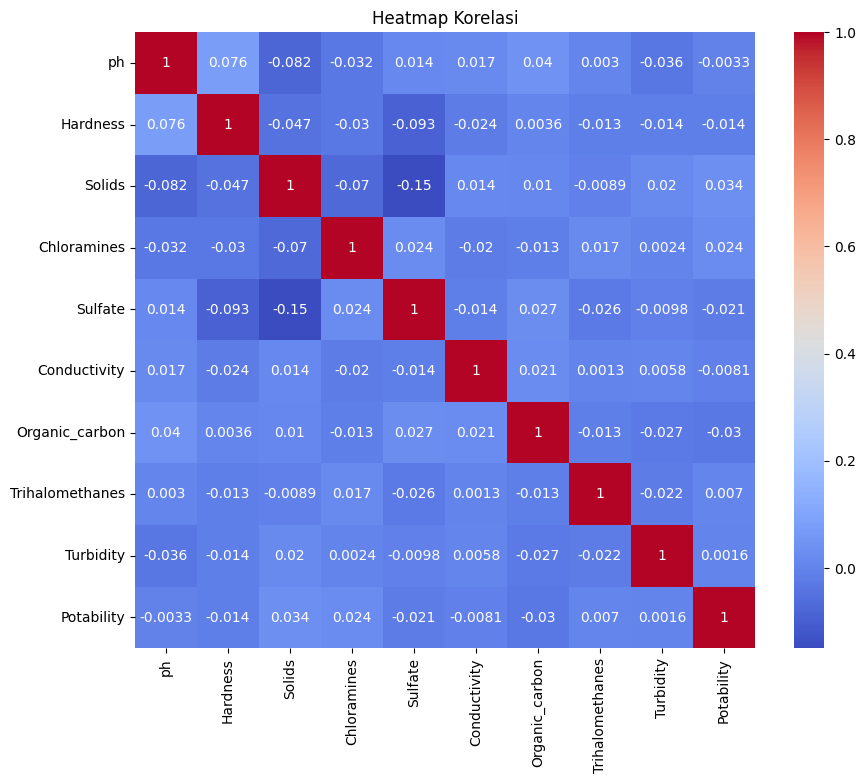

In [6]:
# Langkah 5: Korelasi Heatmap dan Histogram Distribusi
# Korelasi antar kolom
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

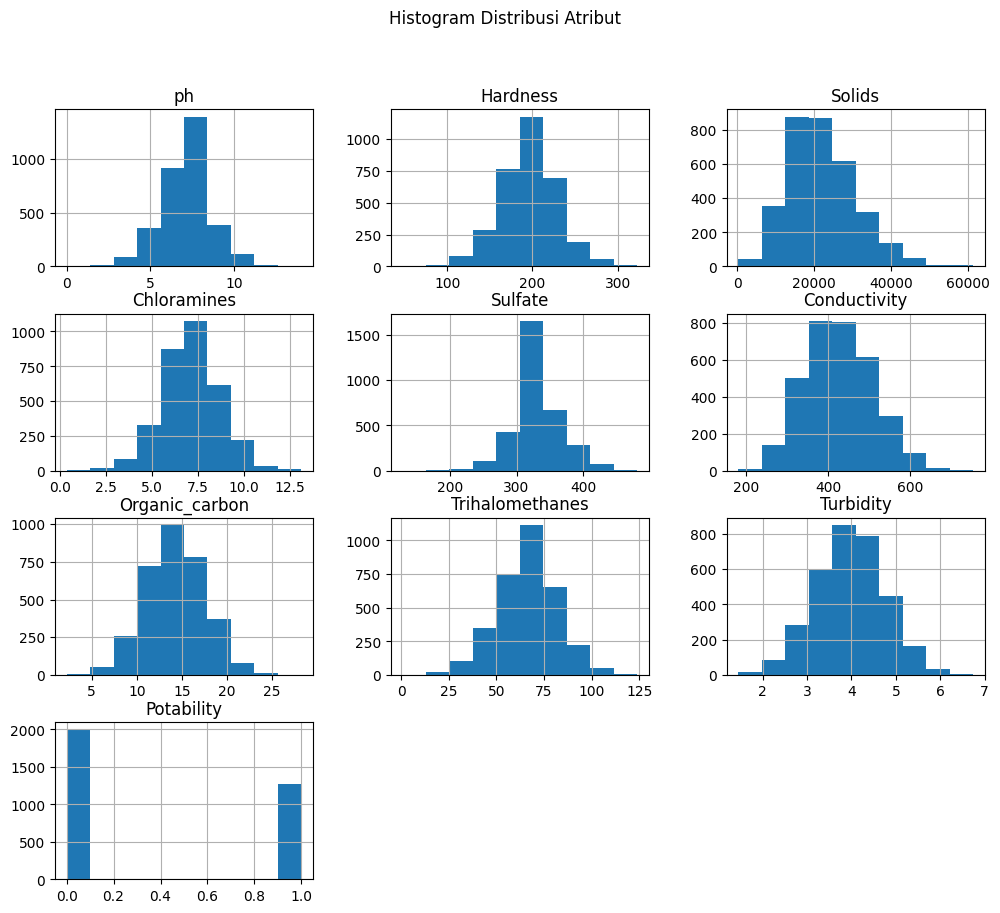

In [7]:
# Histogram untuk distribusi fitur
data.hist(figsize=(12, 10))
plt.suptitle("Histogram Distribusi Atribut")
plt.show()

In [8]:
# Langkah 6: Pemodelan
# Split data menjadi fitur (X) dan target (y)
X = data.drop('Potability', axis=1)
y = data['Potability']

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.688708036622584


In [10]:
# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.6276703967446592


In [11]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 0.5635808748728383


In [12]:
# Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Random Forest setelah dinormalisasi
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_accnorm = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy after normalization:", rf_accnorm)

Random Forest Accuracy after normalization: 0.688708036622584


In [14]:
# SVM setelah dinormalisasi
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_accnorm = accuracy_score(y_test, svm_pred)
print("SVM Accuracy after normalization:", svm_accnorm)

SVM Accuracy after normalization: 0.6937945066124109


In [15]:
# Decision Tree setelah dinormalisasi
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_accnorm = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy after normalization:", dt_accnorm)

Decision Tree Accuracy after normalization: 0.5635808748728383



Confusion Matrix for Random Forest:


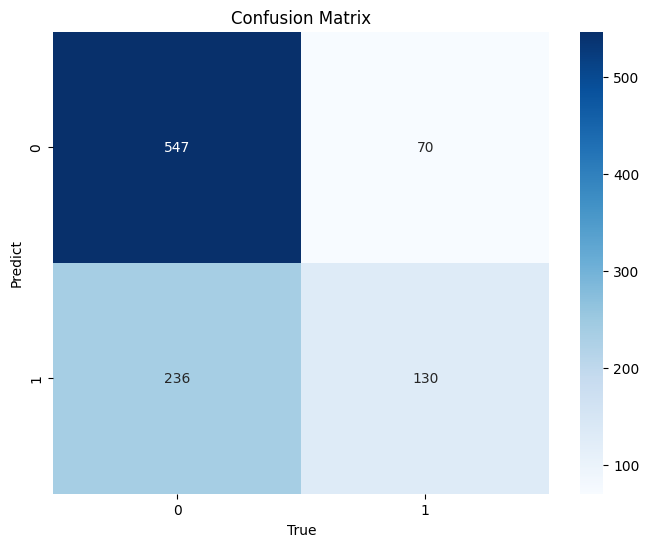


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       617
           1       0.65      0.36      0.46       366

    accuracy                           0.69       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.68      0.69      0.66       983


Confusion Matrix for SVM:


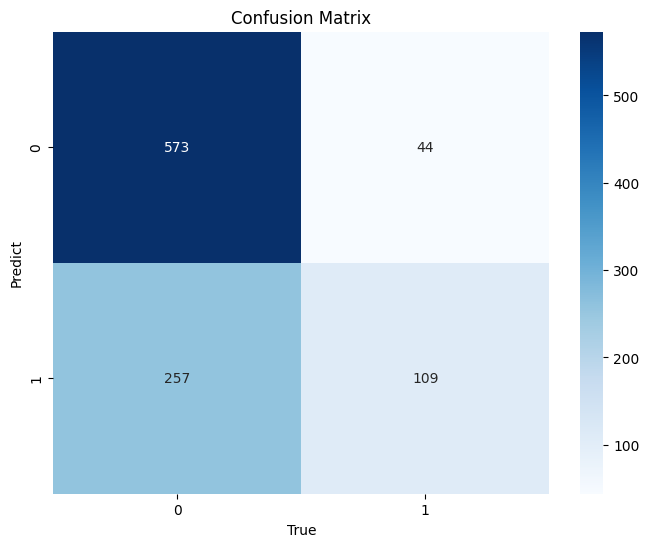


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       617
           1       0.71      0.30      0.42       366

    accuracy                           0.69       983
   macro avg       0.70      0.61      0.61       983
weighted avg       0.70      0.69      0.65       983


Confusion Matrix for Decision Tree:


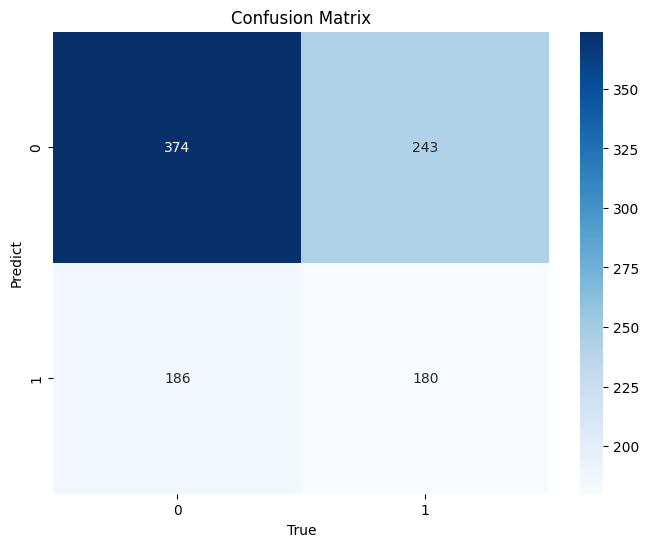


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       617
           1       0.43      0.49      0.46       366

    accuracy                           0.56       983
   macro avg       0.55      0.55      0.55       983
weighted avg       0.58      0.56      0.57       983



In [16]:
# Langkah 7: Evaluasi dan Confusion Matrix
models = {"Random Forest": rf_pred, "SVM": svm_pred, "Decision Tree": dt_pred}
for model_name, pred in models.items():
    print(f"\nConfusion Matrix for {model_name}:")
    cm = confusion_matrix(y_test, pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.xlabel('True')
    plt.ylabel('Predict')
    plt.show()

    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, pred))

In [17]:
# Step 8: Display Accuracy Comparison
print("\nComparison of Model Accuracy:")
print("Without Normalization:", rf_acc, svm_acc, dt_acc)
print("With Normalization:", rf_accnorm, svm_accnorm, dt_accnorm)


Comparison of Model Accuracy:
Without Normalization: 0.688708036622584 0.6276703967446592 0.5635808748728383
With Normalization: 0.688708036622584 0.6937945066124109 0.5635808748728383
